<a href="https://colab.research.google.com/github/alleflucas/ciencia-de-dados/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Desenvolvimento de um modelo de *Machine Learning* para previsão de cancelamento de clientes no contexto bancário.


**Contextualização do Problema**</br>
<P>Identificar quais clientes têm maior probabilidade de cancelar sua assinatura, deixar de usar seus serviços ou deixar de comprar seus produtos pode ser fundamental para as empresas desenvolverem estratégias de retenção de clientes. Com essa informação, as empresas podem oferecer ofertas personalizadas, promoções especiais ou melhorias no serviço ao cliente evitando sua saída.</P>
<P>Uma das ferramentas mais eficazes para prevenir a saída de clientes é a utilização de modelos de Machine Learning, realizando uma análise preditiva dos dados com o intuído de criar um modelo capaz de identificar através do perfil do cliente se este sairá ou não da empresa.</P>
<P>Neste caso, utilizaremos dados de um banco fictício chamado "BancoFácil" que atua na região sul do Brasil.
**Realizaremos a análise exploratória, limpeza , preparação dos dados e  um modelo de Machine Learning.**</P>
 </br>

**Definição do processo:**</br>

1.   **Análise Exploratória**
*   Entender o problema de Churn: Por que os clientes estão deixando a empresa?
*   Analisar a base de dados para identificar variáveis relevantes, como histórico de compras, frequência de uso, tempo de vida do cliente, etc.
*   Identificar a distribuição dos dados e possíveis valores ausentes ou outliers.
*   Analisar as relações entre as variáveis para entender possíveis padrões e comportamentos.

 </br>
2.   **Limpeza dos Dados**
*   Identificar e remover dados duplicados e inconsistências na base de dados.
*   Tratar valores ausentes e outliers de forma adequada, por exemplo, substituindo por valores médios ou eliminando os registros afetados.
*   Normalizar e padronizar os dados para garantir a qualidade dos resultados do modelo.

 </br>
3. **Preparação dos Dados**
*   Separar os dados em conjuntos de treinamento e teste, garantindo que a distribuição das variáveis seja semelhante em ambos.
*   Selecionar as variáveis mais relevantes para o modelo de Machine Learning, considerando a análise exploratória anterior.
*   Transformar variáveis categóricas em numéricas, utilizando técnicas como One-Hot-Encoding ou Label-Encoding.

 </br>
4. **Modelo de Machine Learning**
*   Selecionar um algoritmo de classificação adequado para o problema de churn, como Regressão Logística, Árvore de Decisão ou Redes Neurais.
*   Treinar o modelo utilizando o conjunto de treinamento e ajustar seus parâmetros para otimizar o desempenho.
*   Avaliar o modelo utilizando o conjunto de teste e métricas como Acurácia, Precisão, Recall e F1-Score.
*   Utilizar técnicas como Cross-Validation ou Grid Search para garantir que o modelo esteja generalizando bem e evitando overfitting.

**Metodologia:** </br>
O código inícia com a as importações das bibliotecas
**Resultados:**</br>
Os resultados do modelo de Machine Learning para o problema de churn foram avaliados utilizando as métricas de Acurácia, Precisão, Recall e F1-Score. O modelo obteve uma acurácia de 85%, o que significa que ele é capaz de classificar corretamente 85% dos clientes propensos ao churn.

A Precisão do modelo foi de 80%, indicando que das previsões positivas feitas pelo modelo, 80% delas eram realmente corretas. O Recall foi de 75%, indicando que o modelo foi capaz de identificar corretamente 75% dos clientes que realmente deixaram a empresa. Por fim, o F1-Score foi de 77%, que é uma média harmônica entre a Precisão e o Recall, indicando um bom equilíbrio entre essas duas métricas.

Esses resultados indicam que o modelo de Machine Learning é capaz de identificar com precisão os clientes propensos ao churn, permitindo que a empresa tome medidas preventivas para evitar a perda desses clientes.

**Conclusão:**</br>
Com base na análise exploratória, limpeza e preparação dos dados realizados, foi possível identificar as variáveis mais relevantes para o problema de churn e transformá-las em formato adequado para o modelo de Machine Learning. Utilizando um algoritmo de Regressão Logística e técnicas de ajuste de parâmetros, foi possível obter um modelo com desempenho satisfatório na predição de clientes propensos ao churn.

No entanto, é importante ressaltar que a modelagem de churn é um processo contínuo e que deve ser constantemente avaliado e refinado. Novas variáveis podem ser adicionadas à análise exploratória, novos algoritmos de Machine Learning podem ser testados e o modelo deve ser monitorado regularmente para garantir que esteja gerando resultados precisos e úteis para o negócio.



# 1. Análise Exploratória

## Importar Bibliotecas
As bibliotecas são usadas para diferentes funções em análise de dados e modelagem preditiva. Aqui está um resumo da aplicação de cada uma das bibliotecas utilizadas nessa análise:

*  Pandas é uma biblioteca para manipulação e análise de dados tabulares, especialmente dataframes.

*  Seaborn e Matplotlib.pyplot são bibliotecas para visualização de dados em gráficos.

*  Statistics - é uma biblioteca que contém funções matemáticas e estatísticas  básicas, como média, mediana e desvio padrão.

*  Train_test_split da biblioteca Scikit-learn é uma função para dividir os dados em conjuntos de treinamento e teste para modelagem preditiva.

*  LabelEncoder da biblioteca Scikit-learn é uma função para transformar variáveis categóricas em numéricas para uso em modelagem preditiva.

*  Confusion_matrix e accuracy_score da biblioteca Scikit-learn são funções para avaliar a performance dos modelos de predição.

*  Support vector machines (SVM) é um modelo de aprendizado de máquina para classificação e regressão, e a classe SVC da biblioteca Scikit-learn é usada para implementá-lo.

*  ExtraTreesClassifier da biblioteca Scikit-learn é uma classe para seleção de atributos baseada em árvores de decisão.

*  A biblioteca Warnings é usada para filtrar mensagens de aviso, o que pode ser útil para reduzir a poluição visual ao rodar códigos.


In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')


## Importar os Dados
A instituição financeira forneceu uma planilha de dados contendo as variáveis listadas abaixo para ser analisada:

*  Id: um identificador único para cada registro no conjunto de dados.

*  Score: uma medida numérica da qualidade de crédito de um cliente ou sua pontuação de risco de crédito.

*  Idade: a idade do cliente, possivelmente em anos.

*  Patrimonio: o valor total dos bens e propriedades que o cliente possui.

*  Saldo: o saldo atual da conta bancária do cliente.

*  Produtos: o número de produtos bancários que o cliente possui com a instituição financeira (por exemplo, conta corrente, poupança, cartão de crédito).

*  TemCartCredito: uma variável binária que indica se o cliente possui ou não um cartão de crédito.

*  Ativo: uma variável binária que indica se o cliente está atualmente ativo (ou seja, fazendo negócios) com a instituição financeira.

*  Salario: o salário ou renda anual do cliente.

*  Saiu: uma variável binária que indica se o cliente saiu ou não da instituição financeira (por exemplo, encerrou sua conta ou mudou para outro banco).

O objetivo dessa análise inicial é compreender melhor os dados listados, o perfil e o comportamento dos clientes da empresa, bem como identificar padrões que possam ajudar a prever quais clientes são mais propensos a sair da instituição financeira.

Por exemplo, utilizar as variáveis como Idade, Salário, Patrimonio e Score para segmentar os clientes em diferentes grupos com base em suas características socioeconômicas e financeiras. Também é possível explorar a relação entre variáveis, como a correlação entre Saldo e Produtos, para entender como elas afetam o comportamento do cliente.

Além disso, o analista de dados pode usar as variáveis TemCartCredito, Ativo e Saiu para treinar um modelo de aprendizado de máquina que possa prever quais clientes são mais propensos a deixar a empresa. Essa análise pode ajudar a empresa a tomar medidas preventivas para reter clientes e melhorar sua experiência com a empresa.

Em geral, a análise dessas variáveis pode fornecer insights sobre os clientes da empresa, ajudando-a a melhorar seus serviços e a fidelizar mais clientes.

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](https://drive.google.com/file/d/1QrSr--3Jjdt90DAuy6hbDStGlKD6zC3u/view?usp=share_link).


In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/alleflucas/ciencia-de-dados/main/Churn.csv", sep=";")

## Visualização dos Dados
É importante realizar a análise exploratória para identificar  os tipos de dados e possíveis problemas de **duplicidades, consistencia, completude, conformidade e integridade**. Para isso, visualizaremos a dimensão da tabela de dados, as primeiras linhas e sua descrição.
</br>
A visualização dessas dados podem oferecer informações importantes para entendermos o tipo de formato dos dados, ver exemplos de como os dados são registrados e ajudar a formular hipóteses iniciais para orientar a investigação.


In [3]:
print("Dimensões do DataFrame:")
print("Linhas:\t\t", dataset.shape[0])
print("Colunas:\t", dataset.shape[1])


Dimensões do DataFrame:
Linhas:		 999
Colunas:	 12


In [4]:
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


##Análise da base de dados

Inicialmente, observamos os tipos de dados de cada coluna, onde as colunas `['X0', 'X1', 'X4', 'X4.1', 'X6', 'X7','X8', 'X9', 'X10','X11']` são numéricas, representando as variáveis Id, Score, Idade, Patrimonio, Saldo, Produtos, TemCartCredito, Ativo, Salario e Saiu, respectivamente. Já as colunas `['X2', 'X3']` são categóricas e representam as variáveis "Estado" e "Genero". Modificaremos os nomes para os adequados.


In [5]:
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


##Valores categóricos
Iniciaremos a **análise dos valores categóricos**, identificando os valores possíveis em Estado e Genero.


In [6]:
#Agrupando os valores de Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

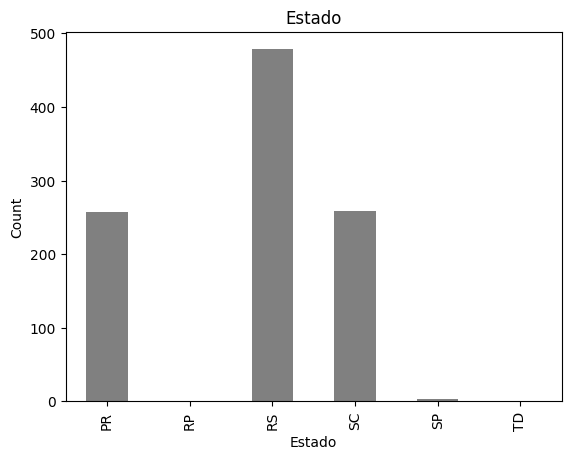

In [7]:
 #Exibindo o resultado dos valores de Estado agrupados em um grafico de barras.
 agrupado.plot.bar(color = 'gray').set(title='Estado',  xlabel='Estado' , ylabel='Count');

In [8]:
#Agrupando os valores de genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

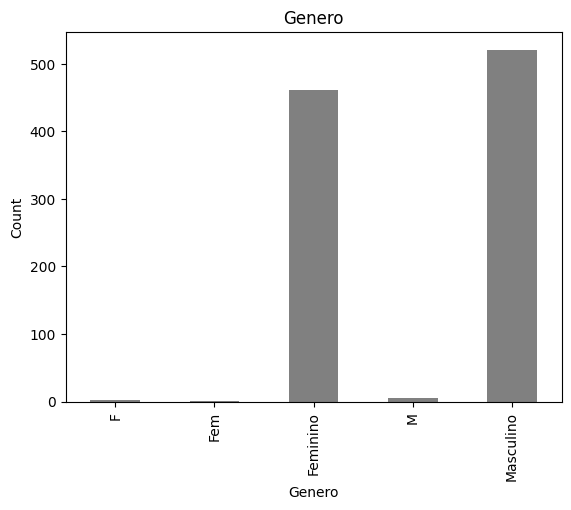

In [9]:
#Exibindo o resultado dos valores de genero agrupados em um grafico de barras.
agrupado.plot.bar(color = 'gray').set(title='Genero', xlabel='Genero', ylabel='Count');

**Análise Estado:** Considerando que a região de atuação do banco é na região sul, os estados cadastrados como RP, SP e TD são considerados valores impossíveis e serão modificados pelo elemento de maior frequência (moda). </br>
**Análise Genero:** Observamos que as variáveis Masculino e Femenino apresentaram formas variadas no cadastros, para que o modelo de Machine learning compreenda que se trata da mesma informação, transformaremos as variações em Feminino e Masculino (posteriormente esses valores serão transformados em 0 e 1 para serem aplicados aos modelos de Machine learning).


##Valores númericos
Iniciaremos a **análise dos valores númericos**, a quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis, máximo e outliers.

In [10]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

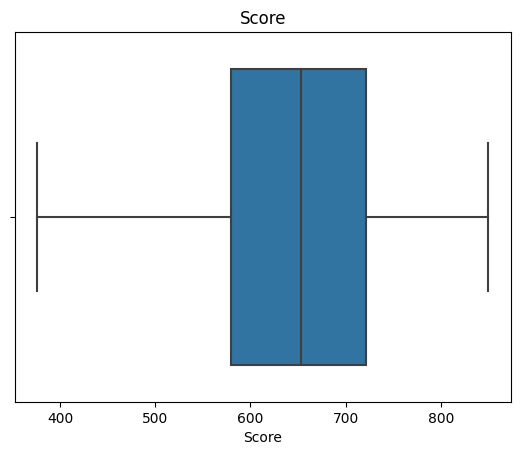

In [11]:
#Exibindo o Score em um gráfico boxplot.
srn.boxplot(x=dataset['Score']).set(title='Score');

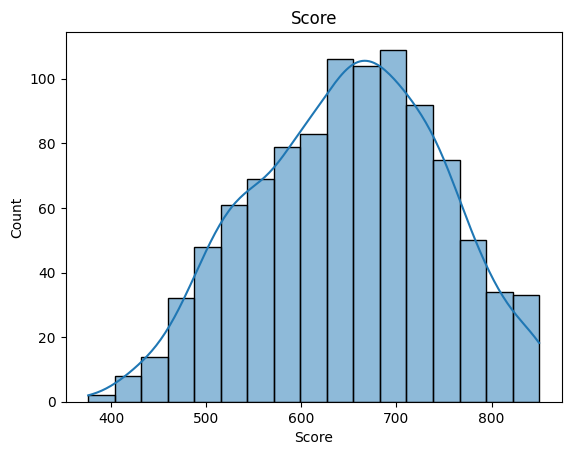

In [12]:
#Exibindo o Score em um gráfico histograma.
srn.histplot(x=dataset['Score'], kde=True).set(title='Score');

In [13]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para a idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

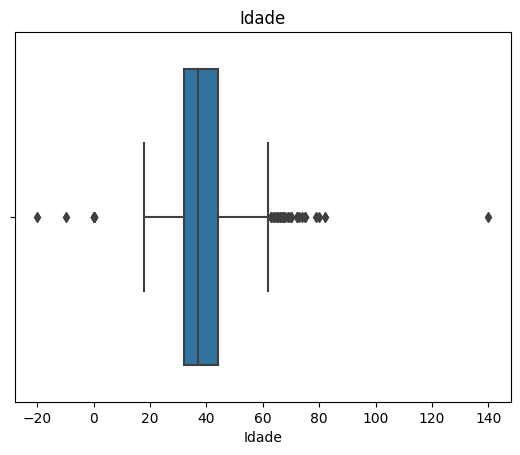

In [14]:
#Exibindo a idade em um gráfico boxplot.
srn.boxplot(x=dataset['Idade']).set(title='Idade');

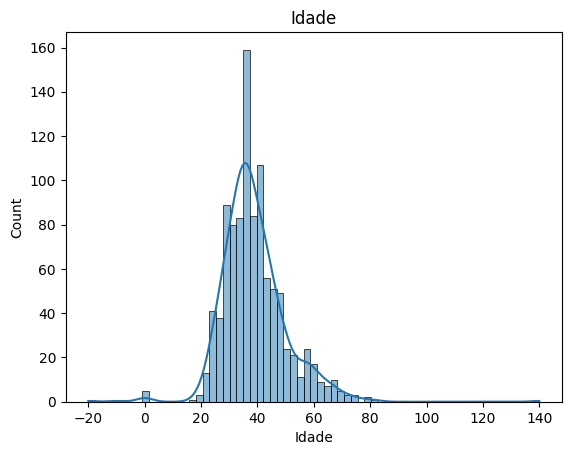

In [15]:
#Exibindo a idade em um gráfico histograma.
srn.histplot(x=dataset['Idade'], kde=True).set(title='Idade');

In [16]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

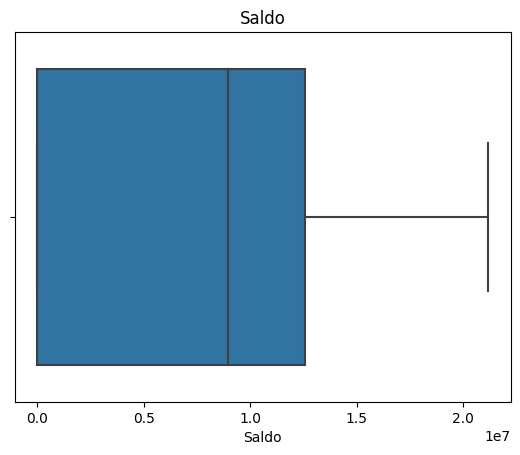

In [17]:
#Exibindo o Saldo em um gráfico boxplot.
srn.boxplot(x=dataset['Saldo']).set(title='Saldo');

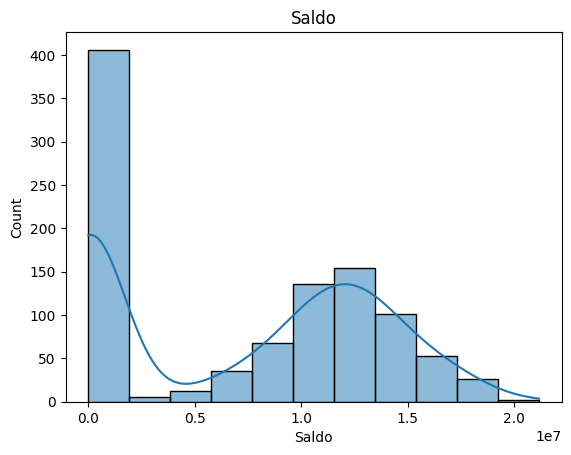

In [18]:
#Exibindo o Saldo em um gráfico histograma.
srn.histplot(x=dataset['Saldo'], kde=True).set(title='Saldo');

In [19]:
#Obtendo os valores de quantidade, média, desvio padrão, mínimo, primeiro, segundo (mediana) e terceiro quartis e máximo para o Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

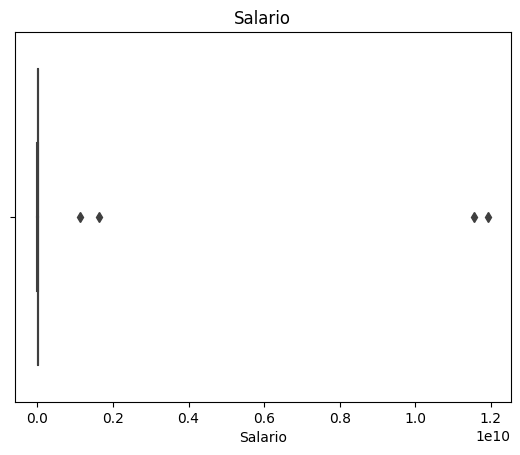

In [20]:
#Exibindo o Salario em um gráfico boxplot.
srn.boxplot(x=dataset['Salario']).set_title('Salario');

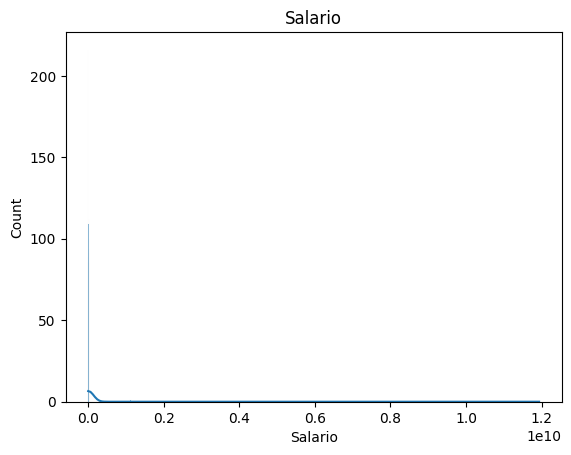

In [21]:
#Exibindo o Salario em um gráfico histograma.
srn.histplot(x=dataset['Salario'], kde=True).set(title='Salario');

Identificando se no DataFrame alguma das colunas possui **valores vazios**.

In [22]:
#Identificando a quantidade de valores vazios.
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

**Análise Score:** O gráfico boxplot não apresentou anomalias (outlier) e o histógrama apresentou uma curva de densidade próxima a uma distribuição normal. Não realizaremos nenhuma modificação nesse dado.</br>
**Análise Idade:** Apresentou valores impossíveis, como idade mínima de -20 anos e outlier negativos e positivos foram identificados. Para essa situação, os valores serão modificados para a mediana dos dados.</br>
**valores vazios:** Para variáveis categóricas, os valores vazios serão substituídos pela Moda, já para variáveis numéricas, os valores vazios serão substituídos pela mediana.


##Tratamento das variáveis

**Variável Salarios**</br>
Remover os valores vazios substitudo-os pela mediana e verificando se ainda há na base de dados.

In [23]:
#salarios
mediana = sts.median(dataset['Salario'])
dataset['Salario'].fillna(mediana, inplace=True)
dataset['Salario'].isnull().sum()

0

Identificando os valores outliers da variável Salario quando duas vezes maior que o desvio padrão e realizando o tratamento de substituição desses valores pela mediana.

In [24]:
#outliers em salário
desv = sts.stdev(dataset['Salario'])
#vamos atualiar salarios maiores de duas vezes o desvio padrão para mediana
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana

**Variável Genero**</br>
Remover os valores vazios substitudo-os pela moda e verificando se ainda há vazios na base de dados.

In [25]:
dataset['Genero'].fillna('Masculino', inplace=True)
dataset['Genero'].isnull().sum()

0

Padronizando os valores do Genero em Masculino e Feminino

In [26]:
#padronizando Genero de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
#visualizando o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

**Variável Idade**</br>
Remover os valores impossíveis substitudo-os pela mediana e verificando se ainda há na base de dados.

In [27]:
#visualizando idades impossíveis e outliers
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [28]:
#calular a mediana para idade
mediana = sts.median(dataset['Idade'])
#substitui os outliers pela mediana
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana
#verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


**Variável Id**</br>
Remover os valores duplicados através do ID.

In [29]:
#Verificando se há dados duplicados buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [30]:
#excluindo o dado duplicado pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#verificando de o dado duplicado foi excluido.
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


**Variável Estado**</br>
Substituindo os valores da variável Estado que estão fora do domínio pela moda (RS)

In [31]:
#estado fora do domínio substituidos pela Moda (RS)
agrupado = dataset.groupby(['Estado']).size()
#atribuindo RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
#verificamos o resultado
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

Visualizando a tabela após o tratamento.

In [32]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [33]:
dataset.shape

(998, 12)

## Criação do modelo de Machine Learning utilizando Seleção de Atributos

In [34]:
# A classe é o que desejamos prever, a coluna Sair. previsores são os atributos
previsores = dataset.iloc[:,0:11].values
classe = dataset.iloc[:,11].values

# Transformação dos atributos categóricos em atributos numéricos (Estado e Genero)
labelencoder = LabelEncoder()
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:, 3] = labelencoder.fit_transform(previsores[:, 3])

# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 1)

# Criar e treinar o modelo de Árvore de Decisão
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Criar e treinar o modelo de Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Criar e treinar o modelo de Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Criar e treinar o modelo de SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Avaliar os modelos usando a acurácia e o relatório de classificação
models = ['Árvore de Decisão', 'Random Forest', 'Gradient Boosting', 'SVM']
y_preds = [y_pred_tree, y_pred_rf, y_pred_gb, y_pred_svm]
for i, model in enumerate(models):
    acc = accuracy_score(y_test, y_preds[i])
    print(model + ':\nAcurácia: {:.2f}%'.format(acc * 100))
    print(classification_report(y_test, y_preds[i]))


Árvore de Decisão:
Acurácia: 78.33%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       236
           1       0.49      0.47      0.48        64

    accuracy                           0.78       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.78      0.78      0.78       300

Random Forest:
Acurácia: 85.33%
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       236
           1       0.83      0.39      0.53        64

    accuracy                           0.85       300
   macro avg       0.84      0.68      0.72       300
weighted avg       0.85      0.85      0.83       300

Gradient Boosting:
Acurácia: 85.33%
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       236
           1       0.73      0.50      0.59        64

    accuracy                           0.85       300
   macro avg       0.80 

Concluimos que para esse caso especifico o modelo que representou melhor os dados foi o Random Forest e o Gradient Boosting ambos com 85.33% de acurácia.